#Pré-processamento e aplicação do algoritmo de Árvore de Decisão e Random Forest em base do Censo Americano

##Importação de bibliotecas utilizadas para análise inicial e da base de dados

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
base_census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iaexpert_academy/Machine Learning/Classificação/census.csv')

###Análises Iniciais da base

In [81]:
base_census.shape

(32561, 15)

In [82]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [84]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB



*   15 colunas sendo 14 atributos e a coluna alvo 'income';
*   6 atributos numéricos e 9 categóricos;





In [85]:
base_census.isna().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0



 Não há valores não nulos (NAN) na base


In [86]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Parece não haver distorçoes nos atributos numéricos da base. Vamos analisar os respectivos histogramas e boxplots para cada variável numérica

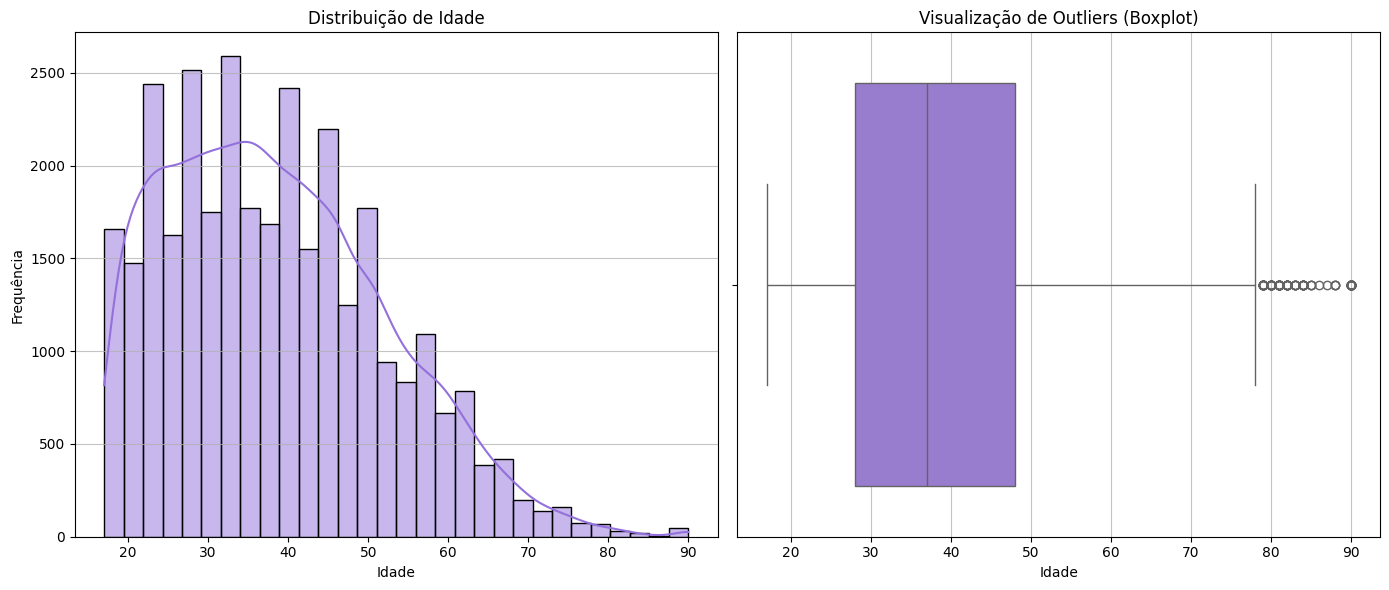

In [87]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(base_census['age'], bins=30, kde=True, color='mediumpurple', ax=axes[0])
axes[0].set_title('Distribuição de Idade')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)


sns.boxplot(x=base_census['age'], color='mediumpurple', ax=axes[1])
axes[1].set_title('Visualização de Outliers (Boxplot)')
axes[1].set_xlabel('Idade')
axes[1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

-- Concentração de idades entre 50 e 25 anos

-- Detecção de outliers

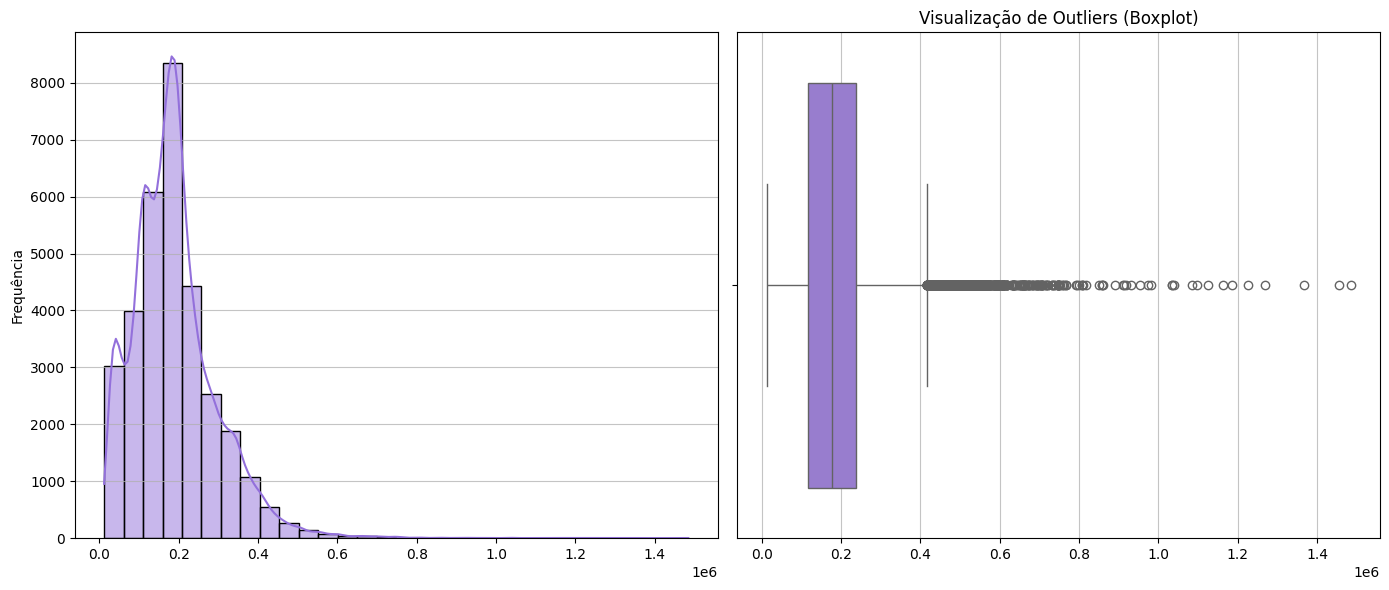

In [88]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(base_census['final-weight'], bins=30, kde=True, color='mediumpurple', ax=axes[0])
axes[0].set_title('')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)


sns.boxplot(x=base_census['final-weight'], color='mediumpurple', ax=axes[1])
axes[1].set_title('Visualização de Outliers (Boxplot)')
axes[1].set_xlabel('')
axes[1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

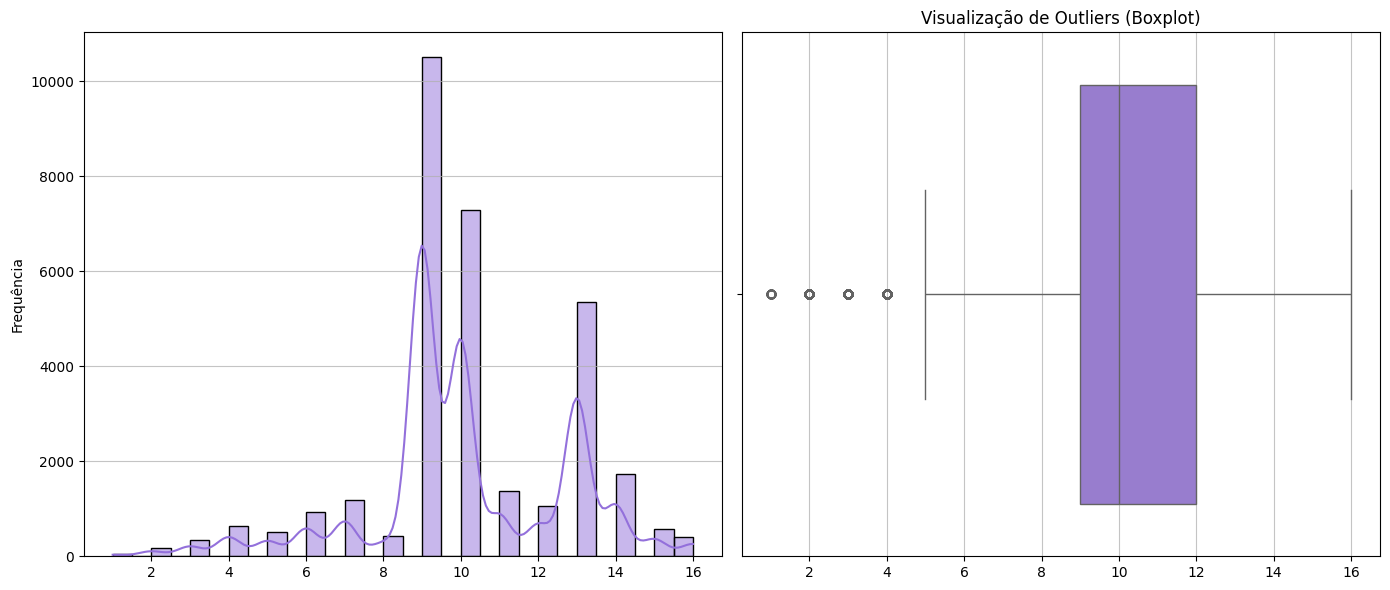

In [89]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(base_census['education-num'], bins=30, kde=True, color='mediumpurple', ax=axes[0])
axes[0].set_title('')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)


sns.boxplot(x=base_census['education-num'], color='mediumpurple', ax=axes[1])
axes[1].set_title('Visualização de Outliers (Boxplot)')
axes[1].set_xlabel('')
axes[1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

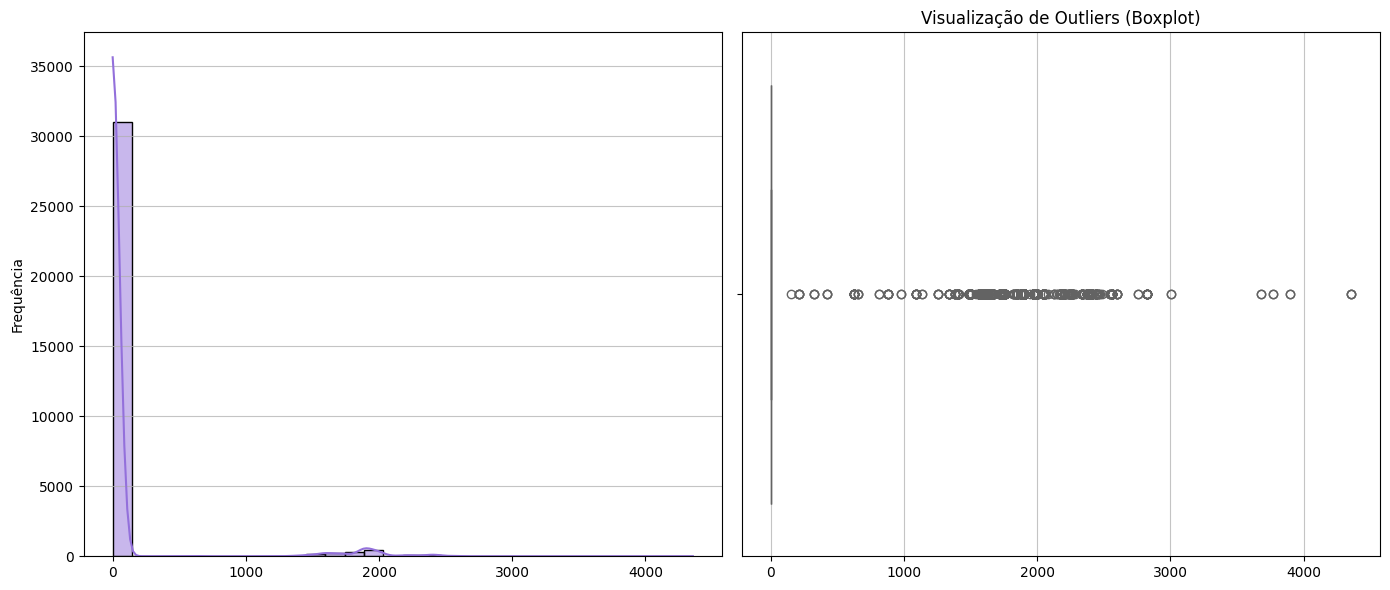

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(base_census['capital-loos'], bins=30, kde=True, color='mediumpurple', ax=axes[0])
axes[0].set_title('')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)


sns.boxplot(x=base_census['capital-loos'], color='mediumpurple', ax=axes[1])
axes[1].set_title('Visualização de Outliers (Boxplot)')
axes[1].set_xlabel('')
axes[1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

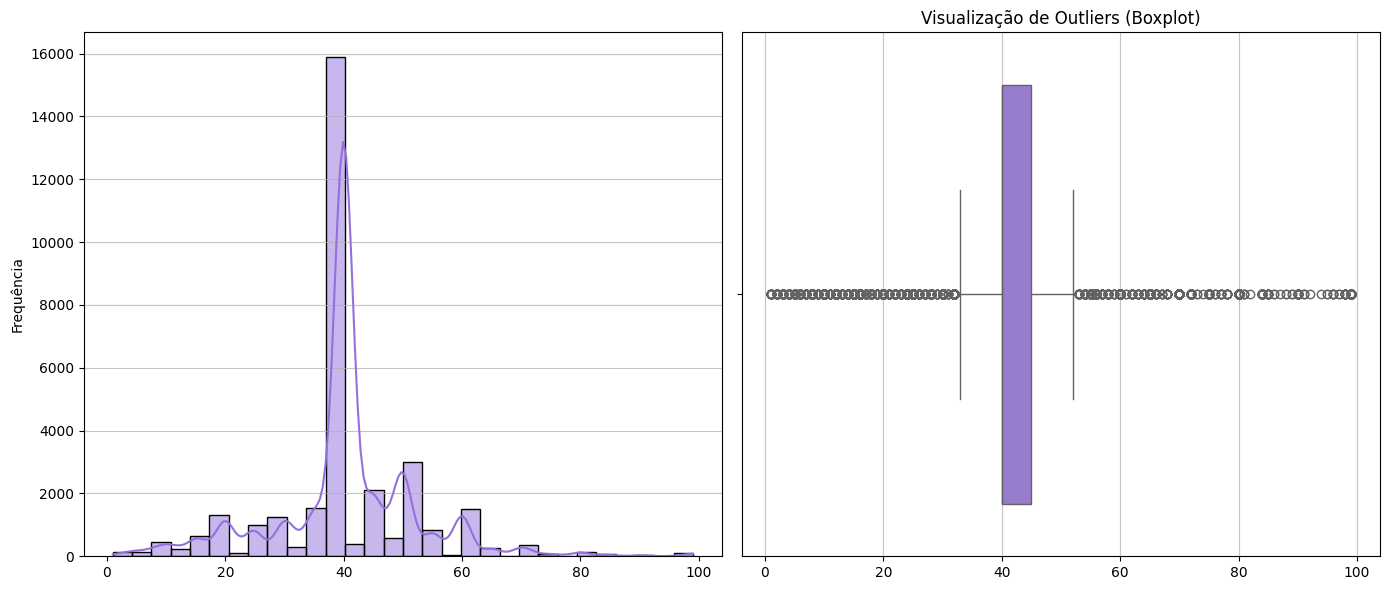

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(base_census['hour-per-week'], bins=30, kde=True, color='mediumpurple', ax=axes[0])
axes[0].set_title('')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)


sns.boxplot(x=base_census['hour-per-week'], color='mediumpurple', ax=axes[1])
axes[1].set_title('Visualização de Outliers (Boxplot)')
axes[1].set_xlabel('')
axes[1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

In [92]:
base_census['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [93]:
base_census['education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [94]:
# 5   marital-status  32561 non-null  object
 #6   occupation      32561 non-null  object
 #7   relationship    32561 non-null  object
 #8   race            32561 non-null  object
 #9   sex             32561 non-null  object
 # 13  native-country  32561 non-null  object
 # 14  income          32561 non-null  object

In [95]:
base_census['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [96]:
base_census['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [97]:
base_census['relationship'].value_counts()

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [98]:
base_census['race'].value_counts()

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


In [99]:
base_census['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


In [100]:
base_census['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [101]:
base_census['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


##Divisão entre previsores e alvo

In [102]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [103]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##Tratamento das variáveis categóricas

###LabelEnconder

In [104]:
base_census_cat = base_census.select_dtypes(include=['object']).columns.to_list()
base_census_cat.pop()
print(base_census_cat)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [105]:
base_census_cat_index  = [base_census.columns.get_loc(col) for col in base_census_cat]
print(base_census_cat_index)


[1, 3, 5, 6, 7, 8, 9, 13]


In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
label_encoders = {}

X_census = base_census.iloc[:, 0:14].values

for i in base_census_cat_index:
  le = LabelEncoder()
  X_census[:, i] = le.fit_transform(X_census[:,i])
  label_encoders[f'col_{i}'] = le


print(X_census.shape)

(32561, 14)


In [108]:
label_encoders['col_1'].classes_

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

###OneHotEncoder


In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [110]:
onehotencoder_base_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), base_census_cat_index)], remainder='passthrough')
X_census = onehotencoder_base_census.fit_transform(X_census).toarray()

In [111]:
X_census.shape

(32561, 108)

In [112]:
from sklearn.preprocessing import StandardScaler


In [113]:
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [114]:
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

##Divisão da base de Treinamento de Teste para Dataset de Crédito e Censo

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [117]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [118]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [119]:
from sklearn.tree import DecisionTreeClassifier


##Árvores de Decisão na base

In [120]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [121]:
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [122]:
previsoes_census = arvore_census.predict(X_census_teste)

In [123]:
from sklearn.metrics import accuracy_score, classification_report

In [124]:
accuracy_score(y_census_teste, previsoes_census)

0.8104401228249745

In [125]:
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

In [126]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



0.8104401228249745

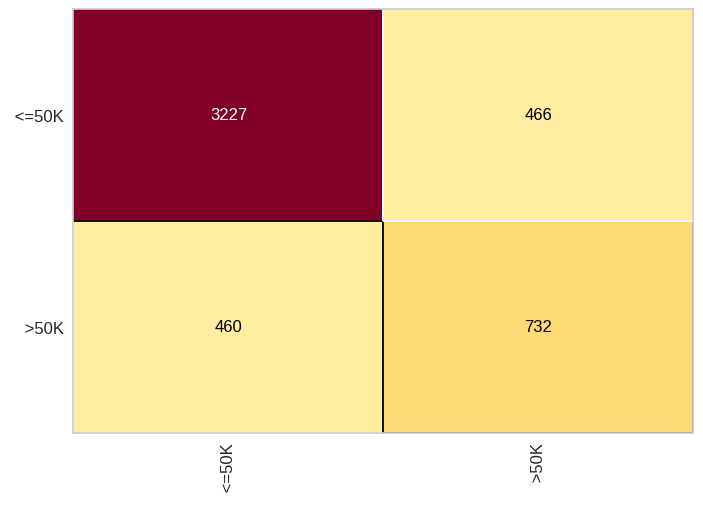

In [127]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

##Random Forest na base


In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
random_forest_census = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)

In [130]:
random_forest_census.fit(X_census_treinamento, y_census_treinamento)
random_forest_census

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [131]:
random_forest_previsao = random_forest_census.predict(X_census_teste)

In [132]:
accuracy_score(y_census_teste, random_forest_previsao)

0.847697031729785

In [133]:
print(classification_report(y_census_teste, random_forest_previsao))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.72      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



0.847697031729785

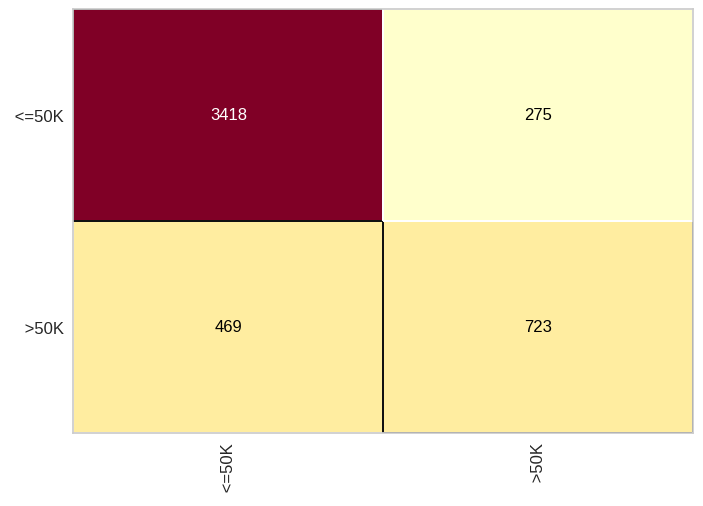

In [134]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)